In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# https://www.kaggle.com/datasets/andonians/random-linear-regression
train_set = pd.read_csv("train_t2.csv")
test_set = pd.read_csv("test_t2.csv")

In [157]:
train_set

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [158]:
print(np.sum(np.isnan(train_set))) # There is a missing value. 
print(np.sum(np.isnan(test_set)))

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


In [159]:
print(train_set[train_set.isna().any(axis=1)]) # it is bigger than 100,Therefore we delete it.

               x   y
213  3530.157369 NaN


In [160]:
train_set.drop([213],axis=0,inplace=True)

In [161]:
train_set.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


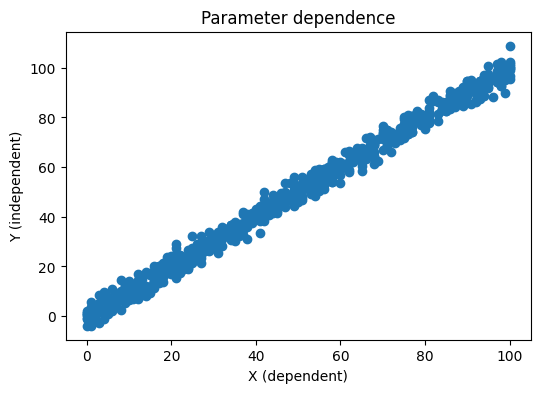

In [162]:
plt.figure(figsize=(6, 4))
X = train_set['x']
Y = train_set['y']
plt.scatter(X, Y)
plt.xlabel('X (dependent)', fontsize=10)
plt.ylabel('Y (independent)', fontsize=10)
plt.title('Parameter dependence', fontsize=12)
plt.show()

In [163]:
from sklearn.model_selection  import train_test_split
y = train_set["y"]
X = train_set.iloc[:,0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(594, 1) (105, 1) (594,) (105,)


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

lr.score(X_train,y_train)*100

99.05328247527427

In [167]:
test_x = test_set['x']
test_y = test_set['y']

Text(0, 0.5, 'Y')

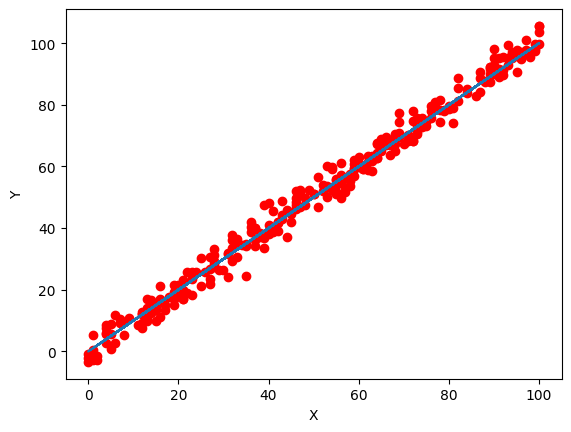

In [168]:
plt.scatter(test_x, test_y, color='red')
plt.plot(X_test, y_predict)
plt.xlabel('X')
plt.ylabel('Y')

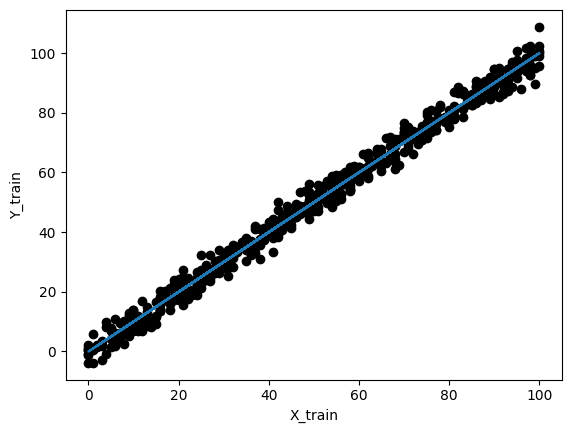

In [166]:
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, y_predict)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()